In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
datapath = "../../../../deeplearning/TensorFlow2.0_ResNet/dataset/"
print(os.path.exists(datapath))
image_dims = (180, 180)
batch_size = 64

True


In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(os.path.join(datapath, "train"),
                                             target_size = image_dims,
                                            batch_size = batch_size,
                                             class_mode = 'binary',
                                            color_mode = 'rgb',
                                                   shuffle=True)
test_generator = test_datagen.flow_from_directory(os.path.join(datapath, "test"), 
                                                             target_size = image_dims,
                                                              batch_size = batch_size,
                                                             class_mode = 'binary', 
                                                             color_mode = 'rgb')
validation_generator = validation_datagen.flow_from_directory(os.path.join(datapath, "valid"), 
                                                     target_size = image_dims,
                                                      batch_size = batch_size,
                                                     class_mode = 'binary', 
                                                     color_mode = 'rgb',
                                                             shuffle=True)

Found 1488 images belonging to 2 classes.
Found 495 images belonging to 2 classes.
Found 498 images belonging to 2 classes.


In [4]:
import matplotlib.pyplot as plt
import numpy as np

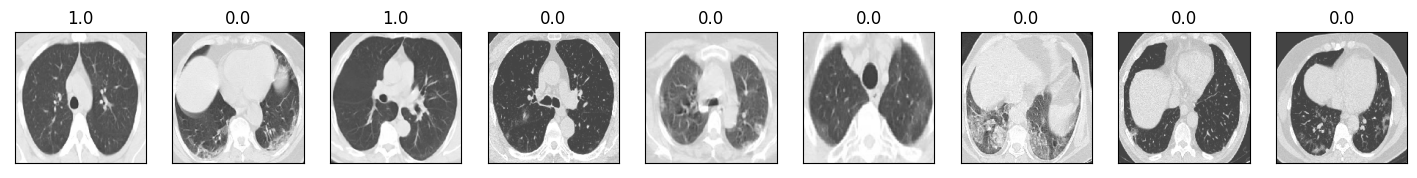

In [5]:
n = 10
plt.figure(figsize=(20, 4))
xtrain, ytrain = next(train_generator)
for i in range(1, n):
    ax = plt.subplot(1, n, i)
    plt.imshow(xtrain[i])
    ax.title.set_text(ytrain[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [6]:
import tensorflow as tf
import keras

In [7]:
tf.get_logger().setLevel('ERROR')

In [8]:
resnet = tf.keras.models.load_model('resnet/best/')
resnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 186, 186, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 90, 90, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 90, 90, 64)   256         ['conv1_conv[0][0]']         

In [9]:
densenet = tf.keras.models.load_model('denseNet/180-1000-500-200-adam-mse-binaryacc')
densenet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 186, 186, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 90, 90, 64)   9408        ['zero_padding2d_2[0][0]']       
                                                                                            

 conv4_block31_1_relu (Activati  (None, 11, 11, 128)  0          ['conv4_block31_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block31_2_conv (Conv2D)  (None, 11, 11, 32)   36864       ['conv4_block31_1_relu[0][0]']   
                                                                                                  
 conv4_block31_concat (Concaten  (None, 11, 11, 1248  0          ['conv4_block30_concat[0][0]',   
 ate)                           )                                 'conv4_block31_2_conv[0][0]']   
                                                                                                  
 conv4_block32_0_bn (BatchNorma  (None, 11, 11, 1248  4992       ['conv4_block31_concat[0][0]']   
 lization)                      )                                                                 
          

In [10]:
vgg19 = tf.keras.models.load_model('vgg19/180-500-200-adam-mse-binaryacc')
vgg19.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [11]:
models = [densenet, vgg19, resnet]

In [12]:
for layer in models[0].layers:
    layer._name = layer.name + str('_0')
for layer in models[1].layers:
    layer._name = layer.name + str('_1')
for layer in models[2].layers:
    layer._name = layer.name + str('_2')
    

In [13]:
models[0].trainable = False
models[1].trainable=False
models[2].trainble=False

In [14]:
models[0]._name = 'densenet169'
models[1]._name = 'vgg19'
models[2]._name = 'resnet50'

In [15]:
input_layer = keras.Input(shape=(180, 180, 3))
y = [model(input_layer) for model in models]
outputs = tf.keras.layers.average(y)
modelEns = keras.Model(input_layer, outputs)
modelEns.summary() 



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 densenet169 (Functional)       (None, 1)            54844781    ['input_1[0][0]']                
                                                                                                  
 vgg19 (Functional)             (None, 1)            21215589    ['input_1[0][0]']                
                                                                                                  
 resnet50 (Functional)          (None, 1)            60552613    ['input_1[0][0]']            

In [16]:
modelEns.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=tf.keras.metrics.BinaryAccuracy(),
)

In [17]:
test_loss, test_acc = modelEns.evaluate(test_generator)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

8/8 [==============================] - 152s 9s/step - loss: 0.0903 - binary_accuracy: 0.8929
Accuracy: 0.8929293155670166
Loss:  0.09025207161903381


In [18]:
history = modelEns.fit(train_generator,
                      epochs=15,
                      validation_data = validation_generator)

Epoch 1/15
24/24 [==============================] - 234s 9s/step - loss: 13.8398 - binary_accuracy: 0.5470 - val_loss: 2.0102 - val_binary_accuracy: 0.5040
Epoch 2/15
24/24 [==============================] - 179s 7s/step - loss: 0.4552 - binary_accuracy: 0.6075 - val_loss: 0.0904 - val_binary_accuracy: 0.9438
Epoch 3/15
24/24 [==============================] - 180s 8s/step - loss: 0.1008 - binary_accuracy: 0.8858 - val_loss: 0.0945 - val_binary_accuracy: 0.9197
Epoch 4/15
24/24 [==============================] - 180s 8s/step - loss: 0.0857 - binary_accuracy: 0.9348 - val_loss: 0.0992 - val_binary_accuracy: 0.8896
Epoch 5/15
24/24 [==============================] - 181s 8s/step - loss: 0.0820 - binary_accuracy: 0.9422 - val_loss: 0.0862 - val_binary_accuracy: 0.9398
Epoch 6/15
24/24 [==============================] - 188s 8s/step - loss: 0.0792 - binary_accuracy: 0.9503 - val_loss: 0.0883 - val_binary_accuracy: 0.9337
Epoch 7/15
24/24 [==============================] - 184s 8s/step - lo

In [20]:
test_loss, test_acc = modelEns.evaluate(test_generator)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

8/8 [==============================] - 45s 6s/step - loss: 0.0875 - binary_accuracy: 0.9111
Accuracy: 0.9111111164093018
Loss:  0.087525375187397


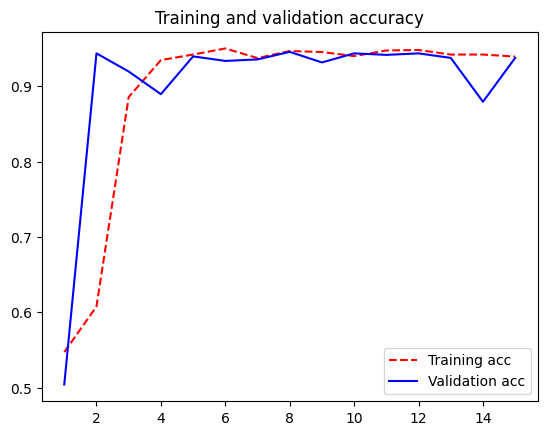

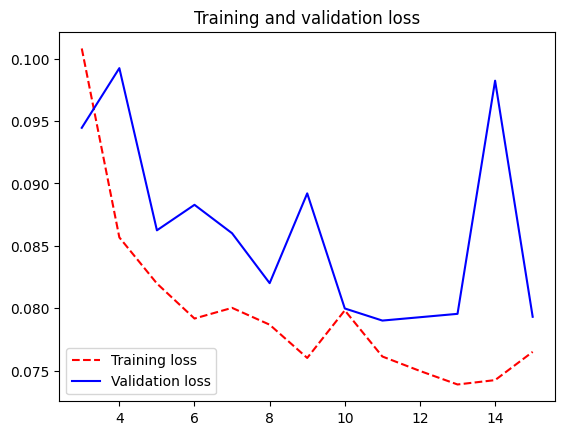

In [21]:
def plot_accuracy_and_loss(history):
    acc = history.history['binary_accuracy']
    val_acc = history.history['val_binary_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, '--r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs[2:], loss[2:], '--r', label='Training loss')
    plt.plot(epochs[2:], val_loss[2:], 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_accuracy_and_loss(history)

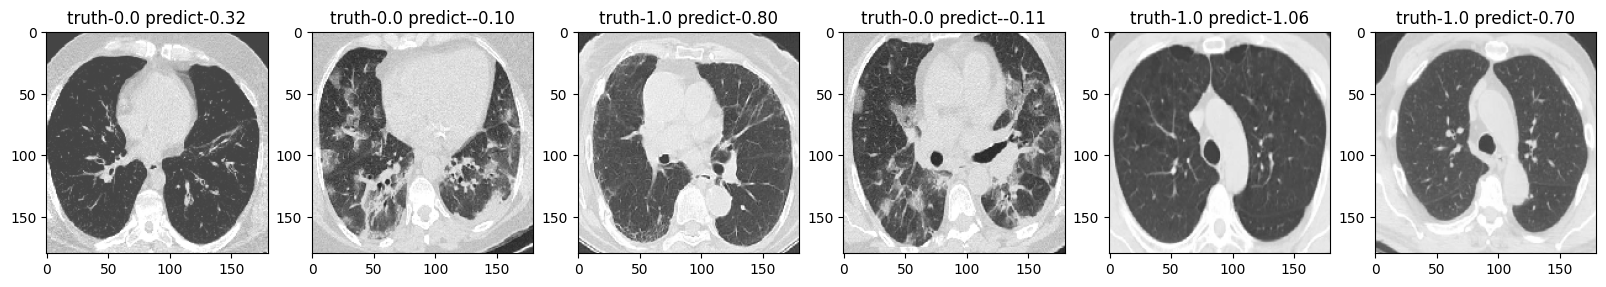

In [23]:
xtest, ytest = next(test_generator)
predictions = modelEns.predict(xtest)
predictions = ['%.2f' %x for x in predictions] 

n = 6
plt.figure(figsize=(20, 4))
for i in range(1, n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(xtest[i])
    plt.gray()
    ax.title.set_text("truth-{0} predict-{1}".format((ytest[i]), (predictions[i]) ) )
    
plt.show()

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [27]:
xtest, ytest = next(test_generator)
ypredict = modelEns.predict(xtest)

In [28]:
ypredict[ypredict >=0.5] = 1.0
ypredict[ypredict < 0.5] = 0.0

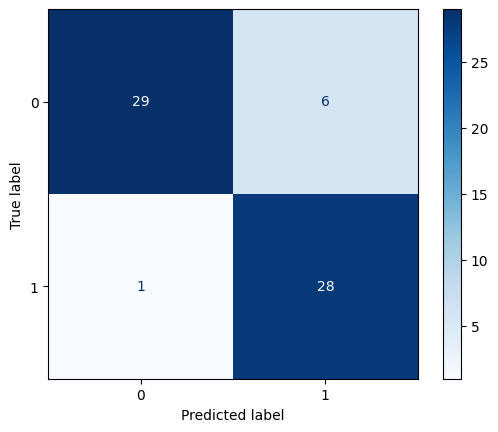

In [29]:
cm = confusion_matrix(ytest, ypredict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [30]:
import pandas as pd
from sklearn.metrics import recall_score ,precision_score,accuracy_score, f1_score,roc_auc_score

In [31]:
def binary_classification_performance(y_test, y_pred):
    tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
    accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_test),2)
    precision = round(precision_score(y_pred = y_pred, y_true = y_test),2)
    recall = round(recall_score(y_pred = y_pred, y_true = y_test),2)
    f1_score = round(2*precision*recall/(precision + recall),2)
    specificity = round(tn/(tn+fp),2)
    npv = round(tn/(tn+fn),2)
    auc_roc = round(roc_auc_score(y_score = y_pred, y_true = y_test),2)


    result = pd.DataFrame({'Accuracy' : [accuracy],
                         'Precision (or PPV)' : [precision],
                         'Recall (senitivity or TPR)' : [recall],
                         'f1 score' : [f1_score],
                         'AUC_ROC' : [auc_roc],
                         'Specificty (or TNR)': [specificity],
                         'NPV' : [npv],
                         'True Positive' : [tp],
                         'True Negative' : [tn],
                         'False Positive':[fp],
                         'False Negative':[fn]})
    return result


binary_classification_performance(ytest, ypredict)

,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.89,0.82,0.97,0.89,0.9,0.82,0.97,29,28,6,1
